### Open Notebook in Colab
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shubhamshah207/AirFlight-Price-Prediction/blob/main/dataPreProcessingAndEDA.ipynb)

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
%matplotlib inline

In [ ]:
df = pd.read_csv('./data/2020.csv')

In [ ]:
df.corr().to_csv('correlation.csv')

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

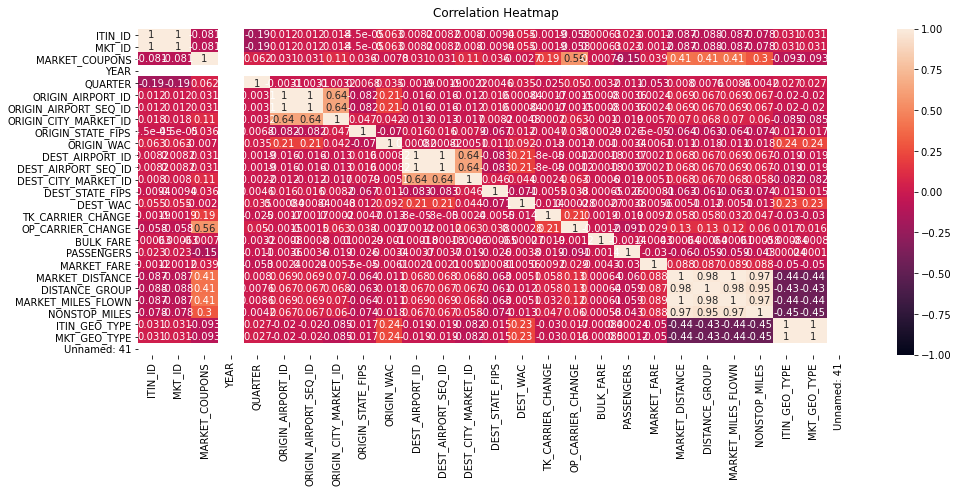

In [4]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [5]:
df.columns

Index(['ITIN_ID', 'MKT_ID', 'MARKET_COUPONS', 'YEAR', 'QUARTER',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_COUNTRY', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_ABR',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_COUNTRY',
       'DEST_STATE_FIPS', 'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEST_WAC',
       'AIRPORT_GROUP', 'WAC_GROUP', 'TK_CARRIER_CHANGE', 'TK_CARRIER_GROUP',
       'OP_CARRIER_CHANGE', 'OP_CARRIER_GROUP', 'REPORTING_CARRIER',
       'TICKET_CARRIER', 'OPERATING_CARRIER', 'BULK_FARE', 'PASSENGERS',
       'MARKET_FARE', 'MARKET_DISTANCE', 'DISTANCE_GROUP',
       'MARKET_MILES_FLOWN', 'NONSTOP_MILES', 'ITIN_GEO_TYPE', 'MKT_GEO_TYPE',
       'Unnamed: 41'],
      dtype='object')

***Unrequired columns will be deleted (not needed columns as same values through out the dataset)***

In [6]:
df = df.drop(['Unnamed: 41', 'YEAR'], axis=1)

***ITIN_ID and MKT_ID are highly correlated so we can remove one of them.***

***ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID, ORIGIN_CITY_MARKET_ID are highly correlated.***
***DEST_AIRPORT_ID, DEST_AIRPORT_SEQ_ID, DEST_CITY_MARKET_ID are highly correlated.***
***Unnamed: 41 is not needed column.***
***ITIN_GEO_TYPE, MKT_GEO_TYPE are highly correlated.***
***MARKET_DISTANCE, DISTANCE_GROUP, MARKET_MILES_FLOWN, NONSTOP_MILES are highly correlated.***

In [7]:
df = df.drop(['MKT_ID'], axis=1)

In [8]:
df = df.drop(['ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID'], axis=1)

In [9]:
df = df.drop(['DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID'], axis=1)

In [10]:
df = df.drop(['MKT_GEO_TYPE'], axis=1)

In [13]:
df = df.drop(['NONSTOP_MILES'], axis=1)

***The travelled miles should be equal to the flown miles. After giving this filter we can remove any of MARKET_MILES_FLOWN and MARKET_DISTANCE as they are same.***

In [16]:
#Use the distance where miles travelled equal to the miles flown
df = df[df['MARKET_MILES_FLOWN'] == df['MARKET_DISTANCE']]

In [17]:
df = df.drop(['MARKET_DISTANCE'],axis=1)

In [22]:
df['MARKET_FARE'].head()


0     0.0
1    28.0
2    28.0
3    28.0
4    40.0
Name: MARKET_FARE, dtype: float64

***As per the boxplot we can remove the values less than 50 and above 1000 for fare price.***

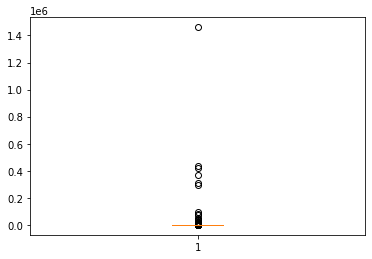

<Figure size 720x504 with 0 Axes>

In [23]:
plt.boxplot(df['MARKET_FARE'])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [26]:
q1 = np.quantile(df['MARKET_FARE'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(df['MARKET_FARE'], 0.75)
med = np.median(df['MARKET_FARE'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

147.0 494.5 -93.5


In [24]:
# eliminate the outliers so that we can get accurate results
df = df[(df['MARKET_FARE'] >= 50) & (df['MARKET_FARE'] <= 1000)]

***BULK_FARE is a categorical variable suggesting multiple tickets bought or not. Which is same as number of PASSENGERS. So we can remove one of both.***


In [27]:
# we can remove bulk fair as we are already having column suggesting number of passangers.
df = df.drop(['BULK_FARE'], axis=1)

In [30]:
df[['MARKET_FARE']].describe()

,MARKET_FARE
count,1.082588e+07
mean,2.197330e+02
std,1.347118e+02
min,5.000000e+01
25%,1.270000e+02
50%,1.860000e+02
75%,2.740000e+02
max,1.000000e+03


***We are good with one reference of origin and destination so removing extra columns suggesting same. Which are ORIGIN_COUNTRY, ORIGIN_STATE_FIPS, ORIGIN_STATE_ABR, ORIGIN_STATE_NM, DEST_COUNTRY, DEST_STATE_FIPS, DEST_STATE_ABR, DEST_STATE_NM.***

In [33]:
# we only need airport name contry, state and FIP codes can be correlated to airports so we can remove that for origin and destinations 
df = df.drop(['ORIGIN_COUNTRY', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST_COUNTRY', 'DEST_STATE_FIPS', 'DEST_STATE_ABR', 'DEST_STATE_NM'], axis=1)

In [36]:
# origin and dest already given so no need of ids of both 
df = df.drop(['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID'], axis=1)

***Ticketing, Operating and Reporting carrier should be same as we can ignore the customers, who changed the carrier. And there should not be any career change. Hence TK_CARRIER_CHANGE and OP_CARRIER_CHANGE should be 0 and then we can remove both the columns.***

In [35]:
#Ticketing, Operating and Reporting carrier should be same as we can ignore the customers, who changed the carrier. And there should not be any career change. Hence TK_CARRIER_CHANGE and OP_CARRIER_CHANGE should be 0 and then we can remove both the columns. 
df = df[(df['TK_CARRIER_CHANGE'] == 0) & (df['OP_CARRIER_CHANGE'] == 0)]

In [37]:
#We can also drop carrier groups for ticketing, operating and reporting. Hence, TK_CARRIER_GROUP and OP_CARRIER_GROUP can be dropped. 
df = df.drop(['TK_CARRIER_CHANGE', 'OP_CARRIER_CHANGE', 'TK_CARRIER_GROUP', 'OP_CARRIER_GROUP'], axis=1)

In [38]:
df = df[(df['TICKET_CARRIER'] == df['REPORTING_CARRIER']) & (df['OPERATING_CARRIER'] == df['REPORTING_CARRIER'])]

***We can also drop carrier groups for ticketing, operating and reporting. Hence, TK_CARRIER_GROUP and OP_CARRIER_GROUP can be dropped.***

In [39]:
df = df.drop(['TICKET_CARRIER', 'OPERATING_CARRIER'], axis=1)

In [40]:
df['MILES'] = df['MARKET_MILES_FLOWN']
df = df.drop(['MARKET_MILES_FLOWN'], axis=1)

In [41]:
df['CONTINUE_USA'] = df['ITIN_GEO_TYPE']
df = df.drop(['ITIN_GEO_TYPE'], axis=1)

In [42]:
df['NUM_OF_TICKETS'] = df['PASSENGERS']
df = df.drop(['PASSENGERS'], axis=1)

In [43]:
df['AIRLINE_COMPANY'] = df['REPORTING_CARRIER']
df = df.drop(['REPORTING_CARRIER'], axis=1)

In [44]:
df['PRICE_PER_TICKET'] = df['MARKET_FARE']
df = df.drop(['MARKET_FARE'], axis=1)

In [50]:
df.to_csv('./data/final_2020.csv', index=False)

In [3]:
df = pd.read_csv('./data/final_2020.csv')

In [51]:
df.isnull().sum()

ITIN_ID             0
MARKET_COUPONS      0
QUARTER             0
ORIGIN              0
ORIGIN_WAC          0
DEST                0
DEST_WAC            0
AIRPORT_GROUP       0
WAC_GROUP           0
DISTANCE_GROUP      0
MILES               0
CONTINUE_USA        0
NUM_OF_TICKETS      0
AIRLINE_COMPANY     0
PRICE_PER_TICKET    0
dtype: int64

In [8]:
df.dtypes

ITIN_ID               int64
MARKET_COUPONS        int64
QUARTER               int64
ORIGIN               object
ORIGIN_WAC            int64
DEST                 object
DEST_WAC              int64
AIRPORT_GROUP        object
WAC_GROUP            object
DISTANCE_GROUP        int64
MILES               float64
CONTINUE_USA          int64
NUM_OF_TICKETS      float64
AIRLINE_COMPANY      object
PRICE_PER_TICKET    float64
dtype: object

In [11]:
df = df.astype({"QUARTER": 'category', 'ORIGIN': 'category', 'ORIGIN_WAC':'category', 'DEST':'category', 'DEST_WAC':'category', 'AIRPORT_GROUP': 'category', 'WAC_GROUP':'category', 'DISTANCE_GROUP':'category', 'CONTINUE_USA':'category', 'NUM_OF_TICKETS':'int64', 'AIRLINE_COMPANY':'category'}, errors='raise')

In [12]:
df.dtypes

ITIN_ID                int64
MARKET_COUPONS         int64
QUARTER             category
ORIGIN              category
ORIGIN_WAC          category
DEST                category
DEST_WAC            category
AIRPORT_GROUP       category
WAC_GROUP           category
DISTANCE_GROUP      category
MILES                float64
CONTINUE_USA        category
NUM_OF_TICKETS         int64
AIRLINE_COMPANY     category
PRICE_PER_TICKET     float64
dtype: object

['QUARTER',
 'ORIGIN',
 'ORIGIN_WAC',
 'DEST',
 'DEST_WAC',
 'AIRPORT_GROUP',
 'WAC_GROUP',
 'DISTANCE_GROUP',
 'CONTINUE_USA',
 'AIRLINE_COMPANY']

In [31]:
df.to_csv('./data/final_2020.csv', index=False)